문자 빈도수의 시각화
## Data Import (.txt)

영어 텍스트 문서를 불러옵니다. 다양한 .txt파일로 테스트해보세요. 텍스트 문서를 변경하려면 아래의 path에 원하는 파일 경로를 지정해주면 됩니다. Project Gutenberg의 open source ebook text file을 예시로 사용하기로 합니다.

In [14]:
path = './Raccoon-short.txt' #길이를 줄이려고 챕터1에서 잘랐습니다. 전체 텍스트는 Racoon-full.txt 입니다.
f = open(path,'r')
print(f.readline()) #preview - 읽은 파일의 첫 줄만 표시 
Text = f.read()
f.close()
#print(Text) #전체 텍
#Text="abCDCD~! b ab"  # 큰 파일에 대해 적용하기 전에 주석을 풀고 small text sample부터 시작해보길 권장합니다.

The Project Gutenberg EBook of Metabolic Adaptation to Climate and



McKay 교재에서와 같이 알파벳 A to Z(대소문자 구분 없음)와 blank(' ')만 카운트하도록 다음과 같은 처리를 해줍니다.


* re.sub( 찾을 문자, 바꿀 문자, text data) 
* 변수명.lower()

특수문자도 포함시켜 사용된 모든 문자의 빈도를 카운트하려면 re.sub()를 생략하면 됩니다.



In [2]:
import re
# re.sub( , , )의 용례
raw =  "123456790abcd efABCDEF!@#$%^&*()_+<>?,./"
print( "FROM "+ raw +" TO "+ re.sub(r'[^a-zA-Z]', "", raw)) # raw string이 re.sub()로 인해 어떻게 바뀌는지 확인해보세요.

FROM 123456790abcd efABCDEF!@#$%^&*()_+<>?,./ TO abcdefABCDEF


In [3]:
# {a to z, A to Z, ' '(blank), ... }를 제외한 문자를 ""(삭제)로 바꾸어주도록 임의의 text file에 대해 테스트해보면 원하는 부분만 출력됩니다.
Text = re.sub(r'[^a-zA-Z ]', "", Text)  #[^a-zA-Z ] :마지막에 blank도 추가
text=Text.lower() # To lower case
print(text) #

distribution of the raccoon procyon lotor and other procyonidae by john n mugaas and john seidensticker and kathleen p mahlkejohnsonthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle metabolic adaptation to climate and distribution of the raccoon procyon lotor and other procyonidaeauthor john n mugaas        john seidensticker        kathleen p mahlkejohnsonrelease date may   ebook language english start of this project gutenberg ebook the raccoon procyon lotor produced by colin bell tom cosmas joseph cooper and theonline distributed proofreading team at httpwwwpgdpnet  smithsonian contributions to zoology  number   metabolic adaptation to climate  and distribution of the raccoon  procyon lotor and other procyonidae  john n mugaas john seidensticker  and kathleen p mahlkejohnson  smithsonian in

## Letter frequency of an arbitrary text file

### Basic syntax

collections의 Counter 함수는 문자의 출현 빈도를 count합니다.

In [4]:
import collections

c = collections.Counter()
print('Initial:', c)

c.update(text)
print('Sequence:', c)

#c.update({'a':1, 'd':5})
#print('Dict    :', c)

Initial: Counter()
Sequence: Counter({' ': 8721, 'e': 2793, 'a': 2471, 't': 2132, 'o': 2009, 'i': 1902, 'r': 1777, 'n': 1755, 's': 1715, 'c': 1142, 'l': 1064, 'd': 954, 'h': 954, 'm': 787, 'p': 636, 'u': 635, 'b': 509, 'f': 459, 'y': 399, 'g': 397, 'v': 313, 'w': 280, 'k': 106, 'x': 61, 'z': 59, 'j': 41, 'q': 23})


이제 문자의 각각의 출현 횟수를 총합으로 나누어 주어 알파벳 출현 빈도를 계산해 줍니다. 

In [5]:
import string

alphabet_list = string.ascii_lowercase[:26]+' '#알파벳과 공백
freq = []
total = sum(c.values())
for letter in alphabet_list:
    freq.append([letter, c[letter]/total])
freq

[['a', 0.0724760955006746],
 ['b', 0.014929313075614478],
 ['c', 0.03349562972957119],
 ['d', 0.02798146301402006],
 ['e', 0.08192057253475685],
 ['f', 0.01346277937467003],
 ['g', 0.011644277585498915],
 ['h', 0.02798146301402006],
 ['i', 0.055786941983926794],
 ['j', 0.0012025576347744471],
 ['k', 0.0031090514460022293],
 ['l', 0.03120783715609785],
 ['m', 0.023083240452865608],
 ['n', 0.051475332903150116],
 ['o', 0.05892532410394791],
 ['p', 0.018654308676013375],
 ['q', 0.0006746055024344459],
 ['r', 0.05212060773156567],
 ['s', 0.05030210594239456],
 ['t', 0.06253299700827125],
 ['u', 0.018624978001994485],
 ['v', 0.009180500967912243],
 ['w', 0.008212588725288907],
 ['x', 0.0017891711151522263],
 ['y', 0.011702938933536692],
 ['z', 0.0017305097671144482],
 [' ', 0.25579280811873056]]

## Draw Hinton diagram of the frequency

이제 출력된 빈도를 바탕으로 Hinton Diagram을 그려봅니다. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## 기존의 hinton 출력 함수에 추가&변경
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    plt.rcParams['figure.figsize'] = [10, 10] #plot size
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))
        
    # McKay Figure 2.1~2.3 과 같은 그림을 임의의 Text Frequency에 대해 뽑도록 설정
    ax.patch.set_facecolor('black') 
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    # 시각화를 위한 축 추가 1) 1-D 일 때
    if len(matrix) == 1: 
        ax.set_yticks(range(27))
        ax.set_yticklabels(alphabet_list[0:26]+'-') # blank -> '-'
    else :
        ax.set_xticks(range(27))
        ax.set_yticks(range(27))
        ax.set_xticklabels(alphabet_list[0:26]+'-')
        ax.set_yticklabels(alphabet_list[0:26]+'-')
    # grid 제거
    ax.grid(False)

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()




###  Hinton diagram of alphabet frequency

McKay교재의 그림 2.1을 보면 문자의 출현빈도를 계산하여 Hinton Diagram으로 표현하였는데, 이제 임의의 텍스트에 대해 적용하여 봅시다. 이 그림에서 각 문자의 출현 빈도(확률)가 흰색 정사각형들의 면적으로 표현된 것을 알 수 있습니다.

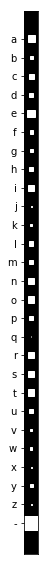

In [7]:
#자료를 matrix type으로 바꿔주기 
f_mat =  np.asarray(freq)[:,1]
l=len(f_mat)
f_mat = f_mat.reshape(1,l).astype('float')
#a-z & blank
hinton(f_mat) #Mckay Fig2.1에 해당
#plt.savefig("fig2_1.png", dpi=200)

### Hinton diagram of joint frequency

McKay교재의 그림 2.2에 해당하는 그림을 출력해봅시다.  우선 인접한 두 글자씩 짝지어서 문자의 출현 빈도를 계산해야 합니다. 마찬가지로 collection의 Counter 함수를 사용합니다.

In [8]:
joint = collections.Counter(zip(text, text[1:]))
c_adj=[]
for (letter1,letter2), ctr in joint.items():
   c_adj.append([letter1+letter2, ctr])
#c_adj #연속된 문자 순서대로 출현 빈도를 계산

이제 이 계산 결과를 바탕으로 알파벳 순서대로 27x27 행렬을 구성해 볼 수 있습니다. 다음의 함수를 통해 결합 분포와 조건부 분포를 계산하여 Hinton Diagram의 input으로 변형합니다.

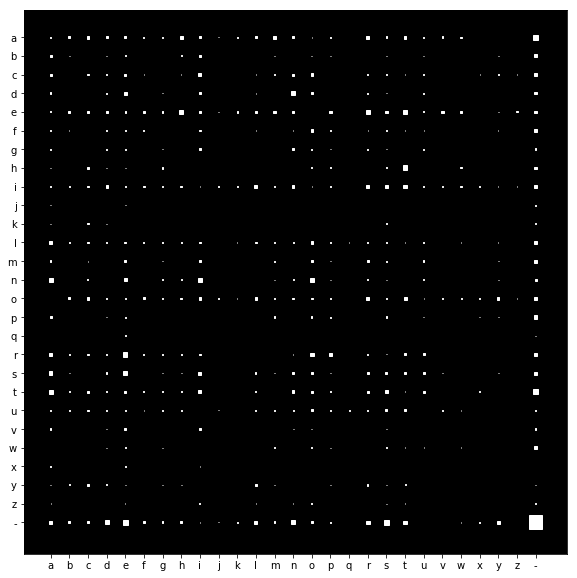

In [9]:
### frequency matrix로 바꿔주는 함수를 하나 정의합니다.
# cond = False 이면 joint probability 계산하고, 그렇지 않은경우: 
  ## given = 1 이면 : 첫번째 문자가 주어졌을 때 두번째 문자의 조건부 계산
  ## given = 2 이면 : 두번째 문자가 주어졌을 때 첫번째 문자의 조건부 계산
def freqMat(c_adj, cond = False, given = None) : 
    c_adj= np.asarray(c_adj) 
    freq_adj = []
    
    if cond == True: #조건부 matrix를 구하는 경우
       given_chr = [x[given-1] for x in c_adj[:,0]] # 1 or 2 번째 문자 빈도 계산
    else: 
       total =  sum(c_adj[:,1].astype('int'))
        
        
    for letter1 in alphabet_list:
        if given ==1 :
            total = sum( c_adj[:,1].astype('int') * (np.array(given_chr) == letter1) ) #row sum
            
        for letter2 in alphabet_list:
            if given ==2 :
               total = sum( c_adj[:,1].astype('int') * (np.array(given_chr) == letter2) ) #col sum
            letters = letter1 + letter2
            is_counted = (c_adj[:,0] == letters)
            
            if is_counted.any(): # 한번이라도 count가 된 경우
               # print([letters, c_adj[is_counted,1].astype('int')[0]/total])
                freq_adj.append([letters, c_adj[is_counted,1].astype('int')[0]/total]) #해당 빈도를 입력
            else : # 사용되지 않은 문자의 경우
                freq_adj.append([letters, 0]) # 빈도는 0
                
    freq_adj = np.asarray(freq_adj)
    freq_matrix = freq_adj[:,1].astype('float').reshape(27,27) #as matrix version
    return freq_matrix
###
freq_adj_matrix = freqMat(c_adj) # 나머지 cond 와 given 에 대한 input은 디폴트를 유지
hinton(freq_adj_matrix)
#plt.savefig("fig2_2.png", dpi=200)

### Hinton diagram of conditional frequency

마지막으로 Mckay교재의 그림2.3에서와 같이 조건부 분포를 시각화해보도록 합니다. 
인접한 문자 'xy'에 대한 조건부 확률분포를 계산하는 과정에서 다음의 식을 이용합니다.
$$P( y |x)= \frac{P(x,y)}{P(x)} $$


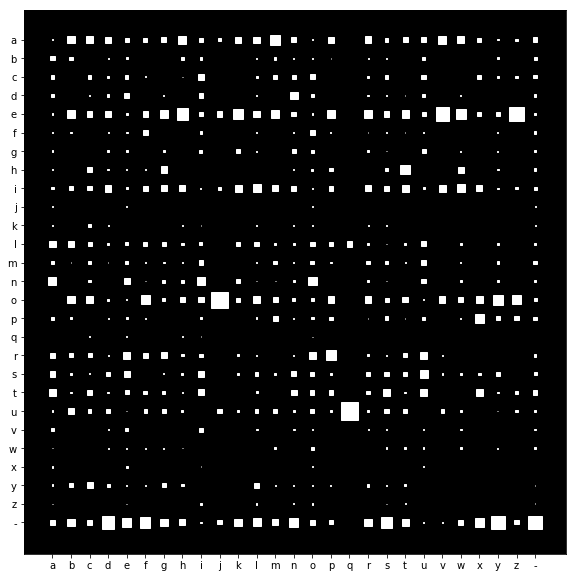

In [10]:
freq_cond_matrix1 = freqMat(c_adj, cond= True, given=1) # 나머지 cond 와 given 에 대한 input은 디폴트를 유지
hinton(freq_cond_matrix1)
#plt.savefig("fig2_3a.png", dpi=200)

$$P( x |y)= \frac{P(x,y)}{P(y)} $$

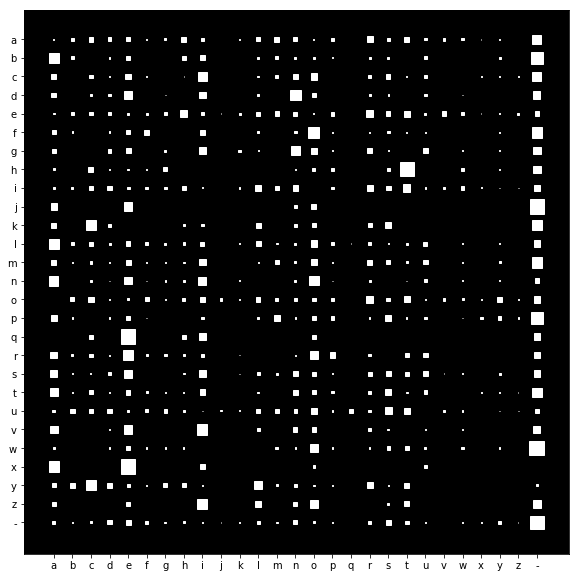

In [11]:
freq_cond_matrix2 = freqMat(c_adj, cond= True, given=2) # 나머지 cond 와 given 에 대한 input은 디폴트를 유지
hinton(freq_cond_matrix2)
#plt.savefig("fig2_3b.png", dpi=200)

##참고자료 
 
 1. McKay textbook
 2. Hinton Diagram & Letter Frequency code snippets
 3. Text source: https://www.gutenberg.org/ebooks/36036